# Heart Failure Prediction

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

## Attribute Information
1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]

In [1]:
# import modules we need for EDA and wrangling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# these functions are useful for splitting and normalization
from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split

# import other functions we'll need for classification modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

# classification error metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
# data type, shape and columns

print("This is the shape :\n", df.shape, '\n') 
print("These are the column names: \n", df.columns, '\n')
print("These are the data types: \n", df.dtypes)

print("\nThis is the head:") 
df.head()   

This is the shape :
 (918, 12) 

These are the column names: 
 Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object') 

These are the data types: 
 Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

This is the head:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

There is no null value. 

## Data Preprocessing & Exploration

In [6]:
print(df.Sex.value_counts())
print(df.ChestPainType.value_counts())
print(df.RestingECG.value_counts())
print(df.ExerciseAngina.value_counts())
print(df.ST_Slope.value_counts())

M    725
F    193
Name: Sex, dtype: int64
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64
N    547
Y    371
Name: ExerciseAngina, dtype: int64
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64


Let's convert categorical variables to numeric variables for analysis and modeling.

In [7]:
size_mapping1 = {
'M': 0,
'F': 1}
df["Sex"] = df["Sex"].map(size_mapping1)

size_mapping2 = {
'N': 0,
'Y': 1}
df["ExerciseAngina"] = df["ExerciseAngina"].map(size_mapping2)

In [8]:
# Create dummy columns and add back to the dataframe
cols = ['ChestPainType', 'RestingECG', 'ST_Slope']

for col in cols:
    df = pd.concat([df, pd.get_dummies(df[col])], axis=1).drop(col,axis=1)

In [9]:
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ASY,ATA,NAP,TA,LVH,Normal,ST,Down,Flat,Up
0,40,0,140,289,0,172,0,0.0,0,0,1,0,0,0,1,0,0,0,1
1,49,1,160,180,0,156,0,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37,0,130,283,0,98,0,0.0,0,0,1,0,0,0,0,1,0,0,1
3,48,1,138,214,0,108,1,1.5,1,1,0,0,0,0,1,0,0,1,0
4,54,0,150,195,0,122,0,0.0,0,0,0,1,0,0,1,0,0,0,1


In [10]:
df.describe()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ASY,ATA,NAP,TA,LVH,Normal,ST,Down,Flat,Up
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.210240,132.396514,198.799564,0.233115,136.809368,0.404139,0.887364,0.553377,0.540305,0.188453,0.221133,0.050109,0.204793,0.601307,0.193900,0.068627,0.501089,0.430283
std,9.432617,0.407701,18.514154,109.384145,0.423046,25.460334,0.490992,1.066570,0.497414,0.498645,0.391287,0.415236,0.218289,0.403770,0.489896,0.395567,0.252957,0.500271,0.495386
min,28.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,130.000000,223.000000,0.000000,138.000000,0.000000,0.600000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,60.000000,0.000000,140.000000,267.000000,0.000000,156.000000,1.000000,1.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,77.000000,1.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


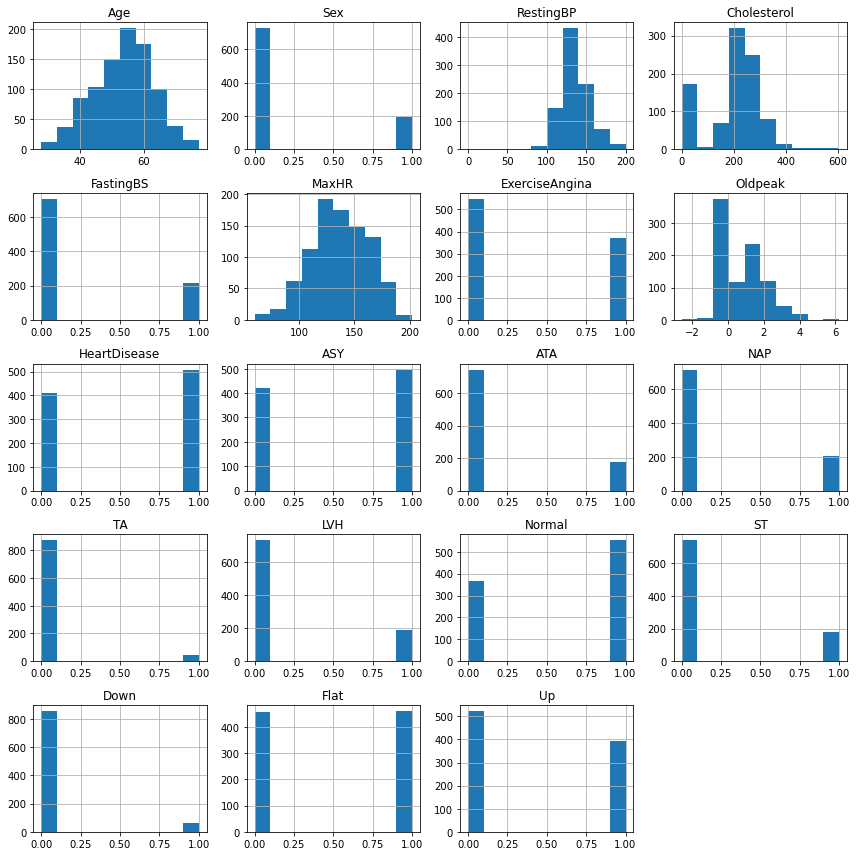

In [11]:
df.hist(figsize=(12,12)) 
plt.tight_layout() 
plt.show()

RestingBP and Cholesterol have 0 as a value and it doesn't make sense. 

In [12]:
print(df[df['Cholesterol'] == 0].count())
print(df[df['RestingBP'] == 0].count())

Age               172
Sex               172
RestingBP         172
Cholesterol       172
FastingBS         172
MaxHR             172
ExerciseAngina    172
Oldpeak           172
HeartDisease      172
ASY               172
ATA               172
NAP               172
TA                172
LVH               172
Normal            172
ST                172
Down              172
Flat              172
Up                172
dtype: int64
Age               1
Sex               1
RestingBP         1
Cholesterol       1
FastingBS         1
MaxHR             1
ExerciseAngina    1
Oldpeak           1
HeartDisease      1
ASY               1
ATA               1
NAP               1
TA                1
LVH               1
Normal            1
ST                1
Down              1
Flat              1
Up                1
dtype: int64


In [13]:
df.loc[(df['Cholesterol'] == 0) & (df['HeartDisease'] == 1) , 'Cholesterol'] = df.loc[(df['Cholesterol'] != 0) 
                                                                                  & (df['HeartDisease'] == 1), 'Cholesterol'].mean()
df.loc[(df['Cholesterol'] == 0) & (df['HeartDisease'] == 0) , 'Cholesterol'] = df.loc[(df['Cholesterol'] != 0) 
                                                                                  & (df['HeartDisease'] == 0), 'Cholesterol'].mean()
df.loc[df['RestingBP'] == 0, 'RestingBP'] = df.loc[df['RestingBP'] != 0, 'RestingBP'].mean()

We changed 0 to the mean of the rest values. For Cholesterol, we should calculate the averages of those who got heart disease and didn't get it respectively.

In [14]:
df.groupby('HeartDisease')['Age','RestingBP','Cholesterol','MaxHR','Oldpeak'].mean()

<ipython-input-14-68e59a38d4e0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('HeartDisease')['Age','RestingBP','Cholesterol','MaxHR','Oldpeak'].mean()


,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
HeartDisease,,,,,
0,50.551220,130.180488,238.769231,148.151220,0.408049
1,55.899606,134.445947,251.061798,127.655512,1.274213


People who have got heart disease tend to be older and have higher blood pressure, cholesterol, oldpeak (ST depression) and lower maximum heart rate.

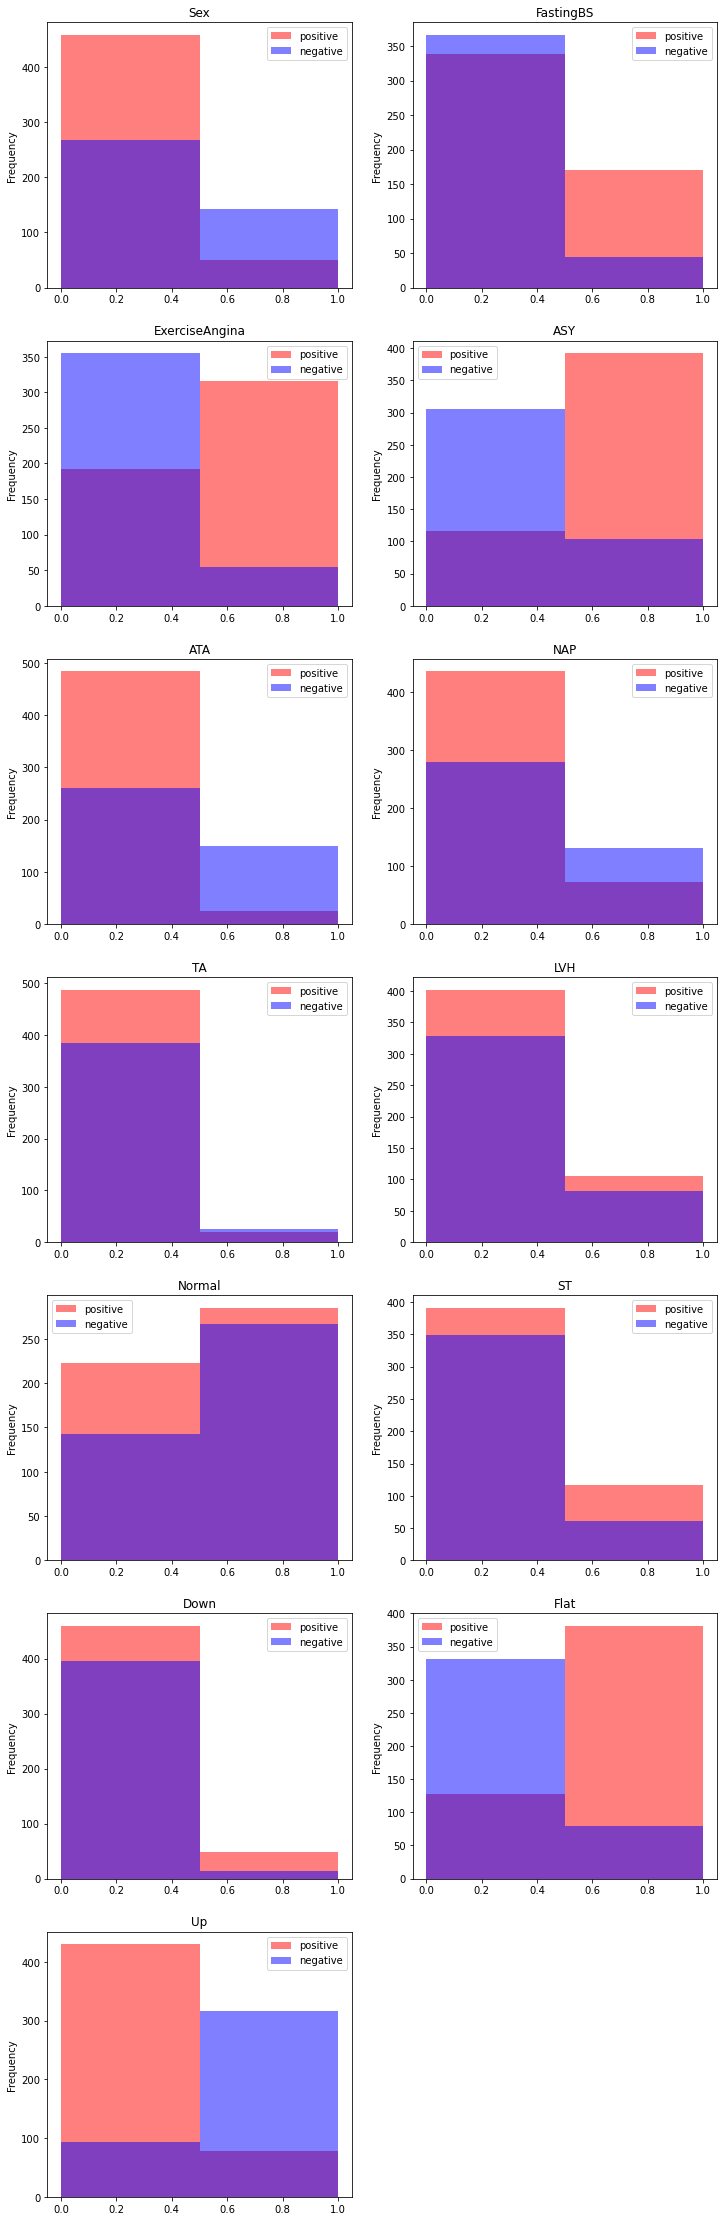

In [15]:
cols = ['Sex','FastingBS','ExerciseAngina','ASY','ATA','NAP','TA','LVH',
                           'Normal','ST','Down','Flat','Up']

plt.figure(figsize=(12, 40))

for col, i in zip(cols, range(1,14)):
    plt.subplot(7, 2, i)
    positive = df[df["HeartDisease"] == 1]
    negative = df[df["HeartDisease"] == 0]
    positive[col].plot.hist(alpha=0.5,color='red',bins=2)
    negative[col].plot.hist(alpha=0.5,color='blue',bins=2)
    plt.legend(['positive','negative'])
    plt.title(col)

plt.show()

- Male : 0, Female: 1
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- ExerciseAngina: exercise-induced angina [Y: 1, N: 0]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

People who have got heart disease tend to have higher fasting blood sugar level, exercise-induced angina, and flat ST slope. Interestingly, there are many cases where their symptoms are asymptomatic.

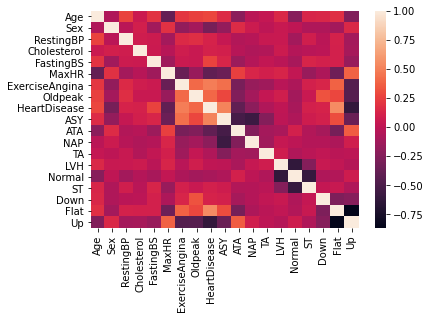

In [16]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

## Modeling

In [17]:
Y = df['HeartDisease']
X = df.drop('HeartDisease', axis=1)
print(Y.shape)
print(X.shape)

(918,)
(918, 18)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.3,
                                                    shuffle = True,
                                                    random_state = 1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(642, 18) (276, 18) (642,) (276,)


In [19]:
X_train

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ASY,ATA,NAP,TA,LVH,Normal,ST,Down,Flat,Up
528,49,0,131.0,142.0,0,127,1,1.5,0,0,1,0,0,1,0,0,1,0
704,50,0,150.0,243.0,0,128,0,2.6,1,0,0,0,1,0,0,0,1,0
675,57,0,150.0,126.0,1,173,0,0.2,0,0,1,0,0,1,0,0,0,1
245,54,0,120.0,171.0,0,137,0,2.0,0,0,0,1,0,1,0,0,0,1
257,36,0,150.0,160.0,0,172,0,0.0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,54,1,108.0,267.0,0,167,0,0.0,0,0,1,0,1,0,0,0,0,1
72,52,0,120.0,182.0,0,150,0,0.0,1,0,0,0,0,1,0,0,1,0
908,63,0,140.0,187.0,0,144,1,4.0,1,0,0,0,1,0,0,0,0,1
235,39,0,120.0,200.0,0,160,1,1.0,0,1,0,0,0,1,0,0,1,0


In [20]:
# convert these all to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [21]:
# Min/Max Scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

X_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000
mean,0.529563,0.211838,0.436423,0.309596,0.228972,0.543208,0.397196,0.393461,0.535826,0.185358,0.228972,0.049844,0.202492,0.591900,0.205607,0.056075,0.493769,0.450156
std,0.193998,0.408929,0.147640,0.107926,0.420499,0.177496,0.489699,0.121430,0.499104,0.388891,0.420499,0.217793,0.402170,0.491865,0.404460,0.230245,0.500351,0.497897
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.395833,0.000000,0.333333,0.247104,0.000000,0.422535,0.000000,0.295455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.541667,0.000000,0.416667,0.316602,0.000000,0.563380,0.000000,0.352273,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.666667,0.000000,0.500000,0.348938,0.000000,0.674296,1.000000,0.465909,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


All the max values are 1 and all min values are 0.

### Logistic Regression

In [23]:
#Recursive Feature Elimination
from sklearn.feature_selection import RFECV

LR = LogisticRegression()
selector = RFECV(LR,cv=10, scoring='roc_auc')
selector.fit(X_train,y_train)

optimized_columns = X_train.columns[selector.support_]
X_train_lr = X_train[optimized_columns]
X_test_lr = X_test[optimized_columns]

In [24]:
LR.fit(X_train_lr, y_train)

train_preds_LR = LR.predict(X_train_lr) 
test_preds_LR = LR.predict(X_test_lr) 

In [25]:
# train report
trainReport_LR = classification_report(y_train, train_preds_LR)
print(trainReport_LR)

              precision    recall  f1-score   support

           0       0.86      0.83      0.84       301
           1       0.85      0.88      0.87       341

    accuracy                           0.86       642
   macro avg       0.86      0.85      0.85       642
weighted avg       0.86      0.86      0.85       642



In [26]:
# test report
testReport_LR = classification_report(y_test, test_preds_LR)
print(testReport_LR)

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       109
           1       0.91      0.87      0.89       167

    accuracy                           0.87       276
   macro avg       0.86      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276



In [27]:
from sklearn.metrics import roc_auc_score
print('Train:', roc_auc_score(y_train, train_preds_LR))
print('Test:', roc_auc_score(y_test, test_preds_LR))

Train: 0.8535039604056859
Test: 0.8699115530407077


### Random Forest

In [28]:
RFC = RandomForestClassifier()
RFC = RFC.fit(X_train, y_train)

train_preds_RFC = RFC.predict(X_train) 
test_preds_RFC = RFC.predict(X_test) 

In [29]:
# train report
trainReport_RFC = classification_report(y_train, train_preds_RFC)
print(trainReport_RFC)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       301
           1       1.00      1.00      1.00       341

    accuracy                           1.00       642
   macro avg       1.00      1.00      1.00       642
weighted avg       1.00      1.00      1.00       642



In [30]:
# test report
testReport_RFC = classification_report(y_test, test_preds_RFC)
print(testReport_RFC)

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       109
           1       0.91      0.92      0.91       167

    accuracy                           0.89       276
   macro avg       0.89      0.88      0.89       276
weighted avg       0.89      0.89      0.89       276



In [31]:
from sklearn.metrics import roc_auc_score
print('Train:', roc_auc_score(y_train, train_preds_RFC))
print('Test:', roc_auc_score(y_test, test_preds_RFC))

Train: 1.0
Test: 0.8846893369224853


### Support Vector Machines

In [32]:
# feature importance
from sklearn import svm

features_names = X_train.columns
svm = svm.SVC(kernel='linear')
svm.fit(X_train, y_train)
svm.coef_

array([[ 0.58996804, -1.06828555,  0.14359477,  0.61422536,  0.90797937,
        -0.09633396,  0.81941039,  1.56320575,  0.65420765, -0.39198342,
        -0.29729478,  0.03507055, -0.04630324,  0.0660004 , -0.01969715,
        -0.04483097,  0.90626494, -0.86143397]])

In [33]:
# Exclude the lowest coefficient column (14)
selected_columns = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17]

In [34]:
X_train_svm = X_train[selected_columns]
X_test_svm = X_test[selected_columns]

In [35]:
# hyperparameter optimization
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'linear']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train_svm, y_train)

# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.

[CV 5/5] END ...................C=10, gamma=1, kernel=linear; total time=   0.0s
[CV 1/5] END ....................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ....................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ....................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ....................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ....................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END .................C=10, gamma=0.1, kernel=linear; total time=   0.0s
[CV 2/5] END .................C=10, gamma=0.1, kernel=linear; total time=   0.0s
[CV 3/5] END .................C=10, gamma=0.1, kernel=linear; total time=   0.0s
[CV 4/5] END .................C=10, gamma=0.1, kernel=linear; total time=   0.0s
[CV 5/5] END .................C=10, gamma=0.1, kernel=linear; total time=   0.0s
[CV 1/5] END ...................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ...............

[CV 1/5] END ...............C=1000, gamma=0.1, kernel=linear; total time=   0.1s
[CV 2/5] END ...............C=1000, gamma=0.1, kernel=linear; total time=   0.1s
[CV 3/5] END ...............C=1000, gamma=0.1, kernel=linear; total time=   0.1s
[CV 4/5] END ...............C=1000, gamma=0.1, kernel=linear; total time=   0.2s
[CV 5/5] END ...............C=1000, gamma=0.1, kernel=linear; total time=   0.4s
[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 4/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 5/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 1/5] END ..............C=1000, gamma=0.01, kernel=linear; total time=   0.1s
[CV 2/5] END ..............C=1000, gamma=0.01, kernel=linear; total time=   0.1s
[CV 3/5] END ..............C

In [36]:
svm = SVC(C=100, gamma=0.001)
svm.fit(X_train_svm, y_train)

train_preds_SVM = svm.predict(X_train_svm) 
test_preds_SVM = svm.predict(X_test_svm) 

In [37]:
# train report
trainReport_SVM = classification_report(y_train, train_preds_SVM)
print(trainReport_SVM)

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       301
           1       0.86      0.89      0.87       341

    accuracy                           0.86       642
   macro avg       0.87      0.86      0.86       642
weighted avg       0.86      0.86      0.86       642



In [38]:
# test report
testReport_SVM = classification_report(y_test, test_preds_SVM)
print(testReport_SVM)

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       109
           1       0.91      0.90      0.91       167

    accuracy                           0.89       276
   macro avg       0.88      0.88      0.88       276
weighted avg       0.89      0.89      0.89       276



In [39]:
from sklearn.metrics import roc_auc_score
print('Train:', roc_auc_score(y_train, train_preds_SVM))
print('Test:', roc_auc_score(y_test, test_preds_SVM))

Train: 0.8626913221811947
Test: 0.8832884689336922


### Gradient Boosting

In [212]:
# hyperparameter optimization
gbc = GradientBoostingClassifier(random_state=1)
parameters = {
    "n_estimators": [50,75,100,150,200,300,500,1000,1500,2000,2500],
    "max_depth":[5,7,10,15,20],
    "learning_rate": [0.01, 0.05, 0.1, 0.25, 0.5, 0.7, 1]
}

cv = GridSearchCV(gbc,parameters, scoring='roc_auc', cv=3)
cv.fit(X_train, y_train)

# print best parameter after tuning
print(cv.best_params_)

# print how our model looks after hyper-parameter tuning
print(cv.best_estimator_)

{'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 75}
GradientBoostingClassifier(learning_rate=0.5, max_depth=5, n_estimators=75,
                           random_state=1)


In [40]:
gbc = GradientBoostingClassifier(learning_rate=0.5, max_depth=5, n_estimators=75, random_state=1)
gbc.fit(X_train, y_train)

train_preds_gbc = gbc.predict(X_train) 
test_preds_gbc = gbc.predict(X_test)

In [41]:
# train report
trainReport_gbc = classification_report(y_train, train_preds_gbc)
print(trainReport_gbc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       301
           1       1.00      1.00      1.00       341

    accuracy                           1.00       642
   macro avg       1.00      1.00      1.00       642
weighted avg       1.00      1.00      1.00       642



In [42]:
# test report
testReport_gbc = classification_report(y_test, test_preds_gbc)
print(testReport_gbc)

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       109
           1       0.91      0.89      0.90       167

    accuracy                           0.88       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.88      0.88      0.88       276



In [43]:
from sklearn.metrics import roc_auc_score
print('Train:', roc_auc_score(y_train, train_preds_gbc))
print('Test:', roc_auc_score(y_test, test_preds_gbc))

Train: 1.0
Test: 0.8743064330055484


## Multilayer Perceptron

In [44]:
# hyperparameter optimization
mlp = MLPClassifier(max_iter=100, random_state=1)

parameter_space = {
    'hidden_layer_sizes': range(1,200),
    'activation': ['tanh', 'relu', 'logistic'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive','invscaling']
}

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, scoring='roc_auc', cv=3)
clf.fit(X_train, y_train)

# print best parameter after tuning
print(clf.best_params_)

# print how our model looks after hyper-parameter tuning
print(clf.best_estimator_)

{'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': 29, 'learning_rate': 'constant', 'solver': 'sgd'}
MLPClassifier(alpha=0.05, hidden_layer_sizes=29, max_iter=100, random_state=1,
              solver='sgd')


C:\Users\newbm\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [45]:
mlp = MLPClassifier(alpha=0.05, hidden_layer_sizes=29, max_iter=100, random_state=1, solver='sgd')
mlp.fit(X_train, y_train)

train_preds_mlp = mlp.predict(X_train) 
test_preds_mlp = mlp.predict(X_test)

C:\Users\newbm\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [46]:
# train report
trainReport_mlp = classification_report(y_train, train_preds_mlp)
print(trainReport_mlp)

              precision    recall  f1-score   support

           0       0.88      0.79      0.84       301
           1       0.83      0.91      0.87       341

    accuracy                           0.85       642
   macro avg       0.86      0.85      0.85       642
weighted avg       0.86      0.85      0.85       642



In [47]:
# test report
testReport_mlp = classification_report(y_test, test_preds_mlp)
print(testReport_mlp)

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       109
           1       0.91      0.90      0.90       167

    accuracy                           0.88       276
   macro avg       0.88      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276



In [48]:
from sklearn.metrics import roc_auc_score
print('Train:', roc_auc_score(y_train, train_preds_mlp))
print('Test:', roc_auc_score(y_test, test_preds_mlp))

Train: 0.8500891456630392
Test: 0.8802944569576443


## Model Comparison

Since we build a model to predict whether a patient will have heart disease or not, it's so important to correctly predict positive observations to all observations in actual class. That's why we decided to use recall for the measurement of model accuracy as well as AUC.

In [49]:
data = {'Recall_train': [0.88, 1.00, 0.89, 1.00, 0.91],
        'Recall_test': [0.87, 0.92, 0.90, 0.89, 0.90],
        'AUC_train': [0.8535, 1.0000, 0.8627, 1.0000, 0.8501],
        'AUC_test': [0.8699, 0.8847, 0.8833, 0.8743, 0.8803]} 

frame = pd.DataFrame(data, index=['Logistic Regression','Random Forest','Support Vector Machines'
                               ,'Gradient Boosting','Multilayer Perceptron'])
frame

,Recall_train,Recall_test,AUC_train,AUC_test
Logistic Regression,0.88,0.87,0.8535,0.8699
Random Forest,1.00,0.92,1.0000,0.8847
Support Vector Machines,0.89,0.90,0.8627,0.8833
Gradient Boosting,1.00,0.88,1.0000,0.8743
Multilayer Perceptron,0.91,0.90,0.8501,0.8803


The Random Forest model has the highest recall and AUC, which means it's our best model.